<a href="https://colab.research.google.com/github/Damodar9866/Damodar9866/blob/main/Fruit_and_vegtable_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

TypeError: 'NoneType' object is not subscriptable

In [ ]:
!kaggle datasets download -d "kritikseth/fruit-and-vegetable-image-recognition"

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:24<00:00, 126MB/s]
100% 1.98G/1.98G [00:24<00:00, 86.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/fruit-and-vegetable-image-recognition.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os

# Check extracted files
extracted_path = "/content/"  # Change if needed
print("Contents of extracted folder:", os.listdir(extracted_path))


Contents of extracted folder: ['.config', '.ipynb_checkpoints', 'validation', 'fruit-and-vegetable-image-recognition.zip', 'test', 'train', 'drive', 'sample_data']


In [ ]:
dataset_path = "/content/validation"  # Change based on Step 1

# List subfolders (should be class names)
print("Contents of dataset folder:", os.listdir(dataset_path))


Contents of dataset folder: ['lemon', 'grapes', 'chilli pepper', 'pineapple', 'peas', 'sweetcorn', 'cabbage', 'spinach', 'carrot', 'beetroot', 'potato', 'corn', 'pear', 'ginger', 'tomato', 'jalepeno', 'watermelon', 'mango', 'cauliflower', 'turnip', 'onion', 'banana', 'raddish', 'orange', 'cucumber', 'capsicum', 'lettuce', 'kiwi', 'sweetpotato', 'eggplant', 'bell pepper', 'paprika', 'apple', 'soy beans', 'garlic', 'pomegranate']


In [ ]:
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

print(f"Number of classes: {len(classes)}")
print("Classes:", classes)


Number of classes: 36
Classes: ['lemon', 'grapes', 'chilli pepper', 'pineapple', 'peas', 'sweetcorn', 'cabbage', 'spinach', 'carrot', 'beetroot', 'potato', 'corn', 'pear', 'ginger', 'tomato', 'jalepeno', 'watermelon', 'mango', 'cauliflower', 'turnip', 'onion', 'banana', 'raddish', 'orange', 'cucumber', 'capsicum', 'lettuce', 'kiwi', 'sweetpotato', 'eggplant', 'bell pepper', 'paprika', 'apple', 'soy beans', 'garlic', 'pomegranate']


In [ ]:
import os

dataset_path = "/content/train"  # Change this to the correct folder

# Dictionary to store image counts per class
image_counts = {}

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it's a folder
        num_images = len([img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))])
        image_counts[class_name] = num_images

# Print the number of images per class
for class_name, count in image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")


Class: lemon, Number of images: 81
Class: grapes, Number of images: 94
Class: chilli pepper, Number of images: 81
Class: pineapple, Number of images: 98
Class: peas, Number of images: 96
Class: sweetcorn, Number of images: 88
Class: cabbage, Number of images: 87
Class: spinach, Number of images: 94
Class: carrot, Number of images: 81
Class: beetroot, Number of images: 87
Class: potato, Number of images: 75
Class: corn, Number of images: 86
Class: pear, Number of images: 88
Class: ginger, Number of images: 68
Class: tomato, Number of images: 92
Class: jalepeno, Number of images: 87
Class: watermelon, Number of images: 83
Class: mango, Number of images: 84
Class: cauliflower, Number of images: 76
Class: turnip, Number of images: 93
Class: onion, Number of images: 93
Class: banana, Number of images: 74
Class: raddish, Number of images: 79
Class: orange, Number of images: 68
Class: cucumber, Number of images: 88
Class: capsicum, Number of images: 84
Class: lettuce, Number of images: 95
Cla

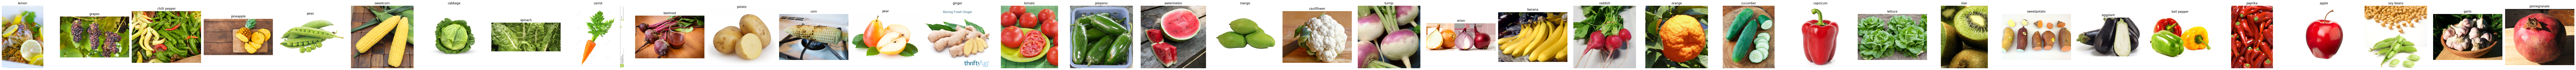

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

# Set up the plot
num_classes = len(image_counts)
fig, axes = plt.subplots(1, num_classes, figsize=(num_classes * 4, 4))  # Adjust size

if num_classes == 1:  # Handle case where there's only one class
    axes = [axes]

# Loop through each class and display one random image
for i, (class_name, count) in enumerate(image_counts.items()):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [img for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

    if image_files:  # Check if there are images in the folder
        random_image = random.choice(image_files)  # Pick a random image
        img_path = os.path.join(class_path, random_image)

        # Read and display the image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        axes[i].imshow(img)
        axes[i].set_title(class_name, fontsize=12)  # Adjust font size
        axes[i].axis("off")

plt.tight_layout()  # Fix overlapping titles
plt.show()
